In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from tqdm import tqdm_notebook
from collections import Counter

import math
import random

import requests, io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read source files

In [ ]:
df_questions = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding='ISO-8859–1')
df_answers = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding='ISO-8859–1')
df_tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding='ISO-8859–1')
df_users = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding='ISO-8859–1')

In [ ]:
print(df_questions.shape)
print(df_answers.shape)
print(df_tags.shape)
print(df_users.shape)

(1264216, 7)
(2014516, 6)
(3750994, 2)
(1990480, 9)


In [ ]:
df_questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
df_answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
df_users.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
df_tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [ ]:
df_questions.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
df_questions.CreationDate = pd.to_datetime(df_questions.CreationDate)

In [ ]:
df_questions.drop(['ClosedDate'],axis=1,inplace=True)

In [ ]:
df_questions.OwnerUserId.isnull().sum()

14454

In [ ]:
df_questions = df_questions[~df_questions.OwnerUserId.isnull()]

In [ ]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   Score         1249762 non-null  int64              
 4   Title         1249762 non-null  object             
 5   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 66.7+ MB


In [ ]:
df_answers.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [ ]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [ ]:
df_answers.CreationDate = pd.to_datetime(df_answers.CreationDate)

In [ ]:
df_answers = df_answers[~df_answers.OwnerUserId.isnull()]

In [ ]:
df_questions[df_questions.Id==180]

,Id,OwnerUserId,CreationDate,Score,Title,Body
3,180,2089740.0,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...


In [ ]:
df_tags[df_tags.Id==180]

,Id,Tag
10,180,algorithm
11,180,language-agnostic
12,180,colors
13,180,color-space


In [ ]:
df_answers[df_answers.ParentId == 180]

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
2,199,50.0,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
9,529,86.0,2008-08-02 18:16:07+00:00,180,3,<p>Isn't it also a factor which order you set ...
10,539,157.0,2008-08-02 19:03:52+00:00,180,21,"<p>My first thought on this is ""how generate N..."
2901,59760,5845.0,2008-09-12 19:00:13+00:00,180,17,<p>It would be best to find colors maximally d...
4761,93908,16632.0,2008-09-18 16:01:24+00:00,180,7,"<p>Some related resources:</p>\n\n<p><a href=""..."
7452,143966,16582.0,2008-09-27 16:39:09+00:00,180,4,<p>Here is some code to allocate RGB colors ev...
87465,1499720,115432.0,2009-09-30 18:00:26+00:00,180,0,"<p>Last I checked <a href=""http://www.jfree.or..."
446804,7815745,678455.0,2011-10-19 01:58:23+00:00,180,1,<p>I know this an old post but I found it whil...
1152817,21634390,135862.0,2014-02-07 17:43:13+00:00,180,0,"<p>To achieve ""most distinguishable"" we need t..."


In [ ]:
df_users[df_users.id==678455]

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
319,319,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183
320,320,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183
321,321,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183
322,322,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183
323,323,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183
324,324,678455,Mauro,2011-03-26 22:38:38.31 UTC,2019-08-31 09:03:03.883 UTC,2604,315,5,183


In [ ]:
df_users.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df_users.isnull().sum()

id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [ ]:
df_users.drop_duplicates(inplace=True)

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                465460 non-null  int64 
 1   display_name      465436 non-null  object
 2   creation_date     465460 non-null  object
 3   last_access_date  465460 non-null  object
 4   reputation        465460 non-null  int64 
 5   up_votes          465460 non-null  int64 
 6   down_votes        465460 non-null  int64 
 7   views             465460 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.0+ MB


In [ ]:
df_users[df_users.display_name.isnull()]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
129535,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
385210,98324,NaN,2009-04-30 07:37:08.027 UTC,2010-08-18 08:00:46.337 UTC,109,0,0,70
627042,75777,NaN,2009-03-09 18:51:49.727 UTC,2018-10-14 02:23:03.763 UTC,2093,31,1,151
690714,428789,NaN,2010-08-23 20:04:56.363 UTC,2019-08-30 14:34:24.577 UTC,9105,247,20,481
938603,844005,NaN,2011-07-14 06:55:45.213 UTC,2019-01-09 13:25:16.583 UTC,3845,515,16,359
986745,1262634,NaN,2012-03-11 17:44:35.57 UTC,2019-09-01 04:59:37.95 UTC,17892,632,306,1223
1103009,248055,NaN,2010-01-11 13:03:36.443 UTC,2019-08-27 11:13:30.147 UTC,7380,257,9,476
1147730,2060669,NaN,2013-02-11 08:36:52.81 UTC,2019-08-30 07:41:01.41 UTC,1052,307,3,64
1358831,2036285,NaN,2013-02-03 00:34:38.88 UTC,2019-08-31 19:32:20.863 UTC,1780,37,5,148
1381529,2128970,NaN,2013-03-03 14:14:33.263 UTC,2019-08-31 22:23:08.713 UTC,450,73,16,58


In [ ]:
df_ques_ans = df_questions.merge(df_answers,how="inner",left_on="Id",right_on="ParentId",suffixes=("_ques","_ans"))
df_ques_ans.head(3)

,Id_ques,OwnerUserId_ques,CreationDate_ques,Score_ques,Title,Body_ques,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008,1109.0,2008-08-13 16:09:09+00:00,80,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S..."
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976,364174.0,2010-09-22 15:37:30+00:00,80,1,<p>What about making your delimiter something ...


In [ ]:
df_ques_ans["Time_to_answer"] = (df_ques_ans.CreationDate_ans - df_ques_ans.CreationDate_ques)/np.timedelta64(1,'h')
df_ques_ans.head(3)

,Id_ques,OwnerUserId_ques,CreationDate_ques,Score_ques,Title,Body_ques,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans,Time_to_answer
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,2.211111
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008,1109.0,2008-08-13 16:09:09+00:00,80,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",290.200556
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976,364174.0,2010-09-22 15:37:30+00:00,80,1,<p>What about making your delimiter something ...,18769.673056


In [ ]:
df_ques_ans.Time_to_answer.describe()

count    1.970843e+06
mean     1.689181e+03
std      6.513656e+03
min     -3.189654e+04
25%      1.466667e-01
50%      5.686111e-01
75%      1.141792e+01
max      7.188370e+04
Name: Time_to_answer, dtype: float64

In [ ]:
df_ques_ans = df_ques_ans[df_ques_ans["Time_to_answer"] > 0]

#Top 10 questions with more number of answers

In [ ]:
df_ques_ans.groupby(["Id_ques"])["Id_ans"].count().sort_values(ascending=False).head(20)

Id_ques
406760      384
38210       300
23930       118
100420       90
40480        69
490420       66
2155930      59
106340       58
226970       54
1218390      50
17054000     49
202750       49
728360       42
24270        42
274230       42
182630       40
173400       40
3412730      39
1358540      38
1584370      38
Name: Id_ans, dtype: int64

In [ ]:
df_ques_tags = df_questions.merge(df_tags,how="inner",left_on="Id",right_on="Id",suffixes=("_ques","_tags"))
df_ques_tags.head(3)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air


In [ ]:
df_ques_tags.Tag.value_counts().head(10)

javascript    122658
java          113811
c#             99847
php            97488
android        89769
jquery         77580
python         63945
html           58170
c++            46910
ios            46628
Name: Tag, dtype: int64

In [ ]:
 tag_count = df_ques_tags.groupby(["Id"])["Tag"].count().sort_values(ascending=False).to_frame()
 tag_count

,Tag
Id,
6492000,5
35706490,5
28154220,5
7277390,5
7277470,5
...,...
30287170,1
13871420,1
32043680,1


In [ ]:
tag_count.rename(columns={'Tag':'Tag_count'},inplace=True)
tag_count.head()

,Tag_count
Id,
6492000,5
35706490,5
28154220,5
7277390,5
7277470,5


#No. of tags vs No. of questions

In [ ]:
tag_count.Tag_count.value_counts()

3    363673
2    322883
4    251491
5    163671
1    148042
0         2
Name: Tag_count, dtype: int64

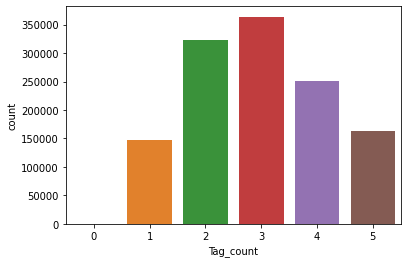

In [ ]:
sns.countplot(data=tag_count,x="Tag_count")
plt.show()

In [ ]:
def find_ds_tag(get_tag):
  check_tags = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
  for tg in check_tags: 
    if (tg == get_tag):
      return "Data Science"
  check_lang_tags = ['java', 'javascript', 'c#', 'php', 'pearl', 'ruby', 'c', 'c++', 'vb.net', 'assembly']
  for tg in check_lang_tags: 
    if (tg == get_tag):
      return "Popular Languages"
    

In [ ]:
df_ques_tags["New_tag"] = df_ques_tags.Tag.apply(lambda x : find_ds_tag(x))
df_ques_tags.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag,New_tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex,None
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3,None
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air,None
3,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn,None
4,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn,None


In [ ]:
df_ques_tags["New_tag"].value_counts()

Popular Languages    532755
Data Science         132280
Name: New_tag, dtype: int64

In [ ]:
df_ques_tags["New_tag"] = df_ques_tags.New_tag.fillna("Others")

In [ ]:
df_ques_tags["Year"] = df_ques_tags.CreationDate.apply(lambda yr: yr.year)

#Ratio of Data Science questions for every year

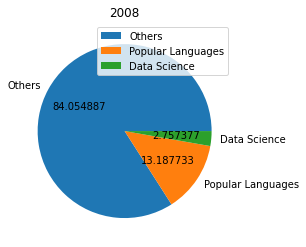

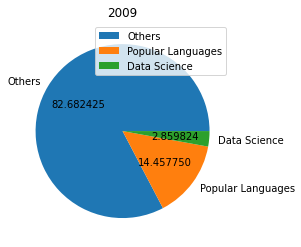

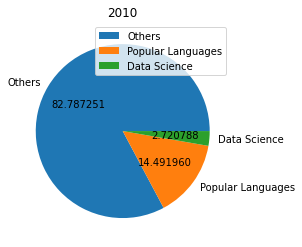

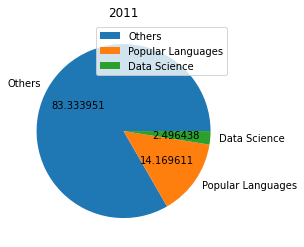

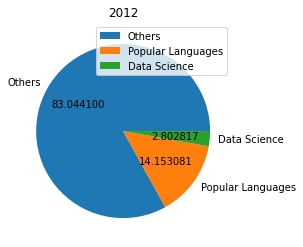

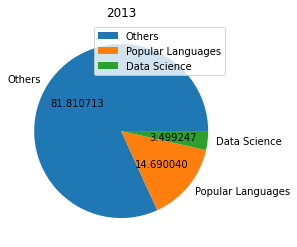

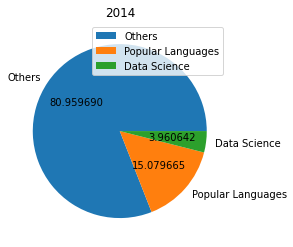

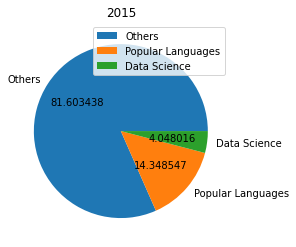

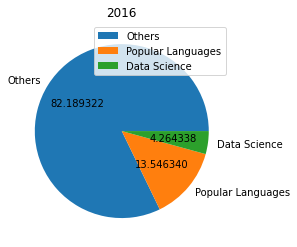

In [ ]:
for yr in df_ques_tags.Year.unique():
  plt.pie(df_ques_tags[df_ques_tags.Year==yr]["New_tag"].value_counts(),labels=["Others","Popular Languages","Data Science"],autopct="%2f")
  plt.legend()
  plt.title(yr)
  plt.show()

#No. of questions for every Data Science tag

In [ ]:
df_ques_tags[df_ques_tags["New_tag"] == "Data Science"].Tag.value_counts()

python    63945
sql       35307
r         15609
excel     10288
matlab     6441
sas         690
Name: Tag, dtype: int64

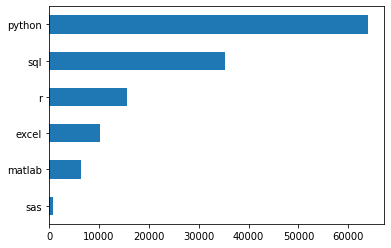

In [ ]:
df_ques_tags[df_ques_tags["New_tag"] == "Data Science"].Tag.value_counts().sort_values(ascending=True).plot.barh()
plt.show()

#Top 20 popular tags

In [ ]:
df_ques_tags.Tag.value_counts().sort_values(ascending=False).head(20)

javascript       122658
java             113811
c#                99847
php               97488
android           89769
jquery            77580
python            63945
html              58170
c++               46910
ios               46628
mysql             41930
css               41758
sql               35307
asp.net           29473
objective-c       26600
ruby-on-rails     25548
.net              23677
c                 22843
iphone            21175
angularjs         20230
Name: Tag, dtype: int64

#Count of users for different tag category

In [ ]:
df_ques_tags.groupby(["New_tag"])["OwnerUserId"].count().sort_values(ascending=False).head(30)

New_tag
Others               3045210
Popular Languages     532755
Data Science          132280
Name: OwnerUserId, dtype: int64

In [ ]:
df_qa_tags = df_ques_ans.merge(df_tags,how="inner",left_on="Id_ques",right_on="Id",suffixes=("_ques","_tags"))
df_qa_tags["New_tag"] = df_qa_tags.Tag.apply(lambda x : find_ds_tag(x))
df_qa_tags.head(3)

,Id_ques,OwnerUserId_ques,CreationDate_ques,Score_ques,Title,Body_ques,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans,Time_to_answer,Id,Tag,New_tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,2.211111,80,flex,None
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,2.211111,80,actionscript-3,None
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,2.211111,80,air,None


In [ ]:
df_qa_tags.drop("Id",axis=1,inplace=True)

In [ ]:
df_qa_tags.New_tag.fillna("Others",inplace=True)

In [ ]:
df_q_t_time = df_qa_tags.groupby(["Id_ques"])["Tag"].count().to_frame().merge(df_qa_tags.groupby(["Id_ques"])["Id_ans"].count().to_frame(),left_on="Id_ques",right_on="Id_ques")
df_q_t_time

,Tag,Id_ans
Id_ques,,
80,9,9
90,12,12
120,3,3
180,36,36
260,36,36
...,...,...
40142860,2,2
40142900,3,3
40142910,3,3


#Top 20 tags with least time taken to get answer

In [ ]:
df_qa_tags.groupby(["Tag"])["Time_to_answer"].min().sort_values(ascending=True).head(20)

Tag
corruption       0.000278
javascript       0.000278
3d               0.000278
window           0.000278
yii              0.000278
winapi           0.000278
pull-request     0.000278
css              0.000278
python-daemon    0.000278
table            0.000278
css-selectors    0.000278
css3             0.000278
salesforce       0.000278
overlay          0.000278
flash            0.000278
llvm             0.000278
jdbc             0.000278
sql              0.000278
android          0.000278
ctypes           0.000278
Name: Time_to_answer, dtype: float64

#No. of questions by year

In [ ]:
df_qa_tags.CreationDate_ques.dt.year.value_counts()

2013    950023
2014    898038
2015    862892
2012    849241
2011    708385
2016    654547
2010    476866
2009    288531
2008     78190
Name: CreationDate_ques, dtype: int64

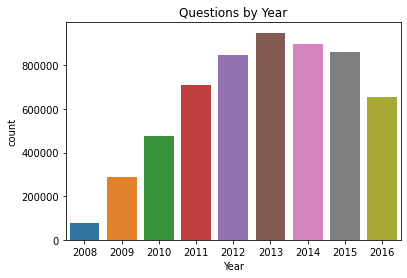

In [ ]:
sns.countplot(data=df_qa_tags[df_qa_tags.New_tag=="Data Science"],x=df_qa_tags.CreationDate_ques.dt.year)
plt.xlabel("Year")
plt.title("Questions by Year")
plt.show()

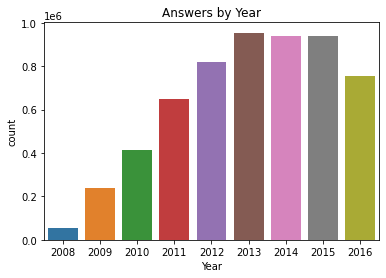

In [ ]:
sns.countplot(data=df_qa_tags[df_qa_tags.New_tag=="Data Science"],x=df_qa_tags.CreationDate_ans.dt.year)
plt.xlabel("Year")
plt.title("Answers by Year")
plt.show()

#Top 30 Highest Scoring tags

In [ ]:
df_T_high_score = df_qa_tags.groupby(["Tag"])["Score_ques"].sum().sort_values(ascending=False).head(30).to_frame()
df_T_high_score

,Score_ques
Tag,
java,1190895
javascript,1183752
c#,954333
android,676863
python,564026
jquery,540661
git,488482
html,488087
php,482258


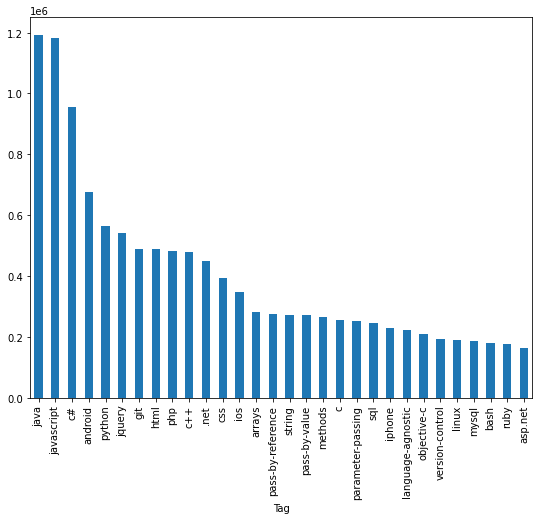

In [ ]:
plt.figure(figsize=[9,7])
df_qa_tags.groupby(["Tag"])["Score_ques"].sum().sort_values(ascending=False).head(30).plot.bar()
plt.show()

#30 Lowest Scoring tags

In [ ]:
df_T_low_score = df_qa_tags.groupby(["Tag"])["Score_ques"].sum().sort_values(ascending=False).tail(30).to_frame()
df_T_low_score

,Score_ques
Tag,
release-cycle,-10
com-interface,-10
unreachable-statement,-11
invalid-argument,-11
mysql-num-rows,-11
rmdir,-11
iusertype,-11
keyset,-12
access,-12


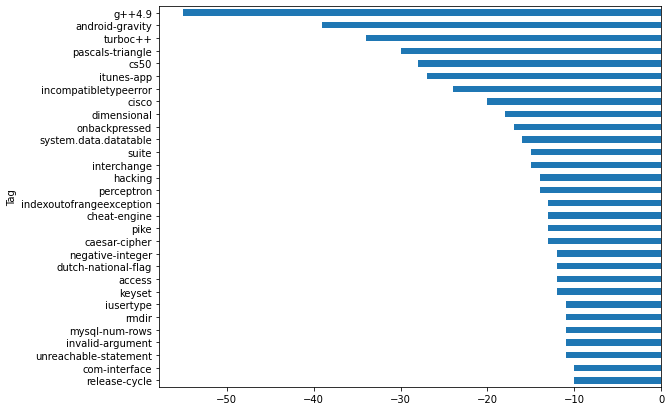

In [ ]:
plt.figure(figsize=[9,7])
df_qa_tags.groupby(["Tag"])["Score_ques"].sum().sort_values(ascending=False).tail(30).plot.barh()
plt.show()

#Average score of Data Science tags

In [ ]:
df_qa_tags[df_qa_tags.New_tag=="Data Science"].groupby(["Tag"])["Score_ques"].mean().sort_values(ascending=False)

Tag
python    5.469661
sql       3.658948
r         3.365150
matlab    2.235470
excel     1.406699
sas       1.048638
Name: Score_ques, dtype: float64

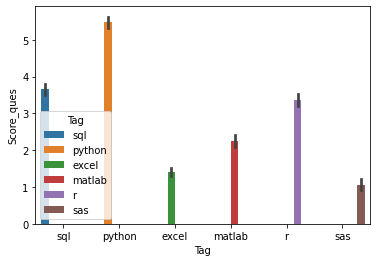

In [ ]:
sns.barplot(data=df_qa_tags[df_qa_tags.New_tag=="Data Science"],x="Tag",y="Score_ques",estimator=np.mean,hue="Tag")
plt.show()

In [ ]:
#df_qa_tags[df_qa_tags.New_tag=="Data Science"].groupby(["Tag"])["Time_to_answer"].mean().sort_values(ascending=False)

30 tags with highest average response time

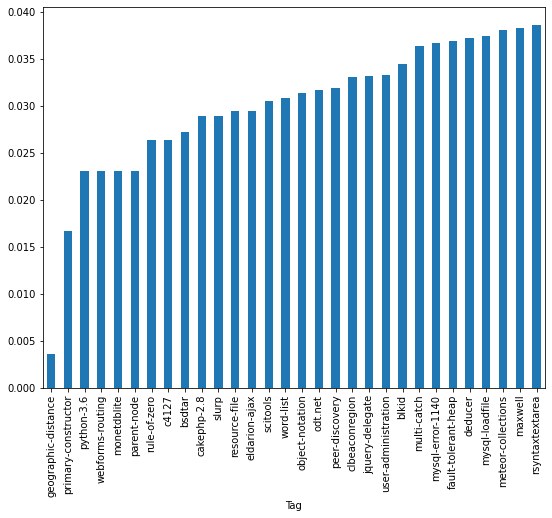

In [ ]:
plt.figure(figsize=[9,7])
df_qa_tags.groupby(["Tag"])["Time_to_answer"].mean().sort_values(ascending=True).head(30).plot.bar()
plt.show()

In [ ]:
df_qa_tags["Time_to_answer"].describe()

count    5.766713e+06
mean     1.722715e+03
std      6.532513e+03
min      2.777778e-04
25%      1.613889e-01
50%      6.655556e-01
75%      1.517889e+01
max      7.188370e+04
Name: Time_to_answer, dtype: float64

In [ ]:
df_qa_tags.drop(columns=["Title","Body_ques","Body_ans"],inplace=True)

#Approximate time to get answer for Data Science tags

In [ ]:
df_DS_response_time = pd.pivot_table(df_qa_tags[df_qa_tags.New_tag=="Data Science"],index=["Id_ques","Tag"],values="Time_to_answer",aggfunc='min').groupby(["Tag"])["Time_to_answer"].mean().to_frame()
df_DS_response_time.Time_to_answer = df_DS_response_time.Time_to_answer/24
df_DS_response_time

,Time_to_answer
Tag,
excel,10.114870
matlab,8.546587
python,9.101865
r,8.693300
sas,4.484392
sql,3.794309


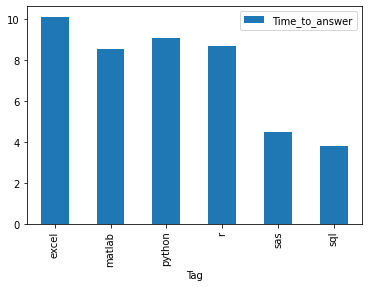

In [ ]:
df_DS_response_time.plot.bar()
plt.show()

In [ ]:
pd.pivot_table(df_qa_tags[df_qa_tags.New_tag=="Data Science"],index=["Id_ques","Tag"],values="Time_to_answer",aggfunc='min')["Time_to_answer"].describe()

count    117128.000000
mean        182.047967
std        1450.719770
min           0.000278
25%           0.103889
50%           0.304722
75%           1.587222
max       49005.662778
Name: Time_to_answer, dtype: float64

#Top 30 tags with least time taken to get answer

In [ ]:
df_first_answer = pd.pivot_table(df_qa_tags,index=["Id_ques","Tag"],values="Time_to_answer",aggfunc='min').groupby(["Tag"])["Time_to_answer"].mean().to_frame()
df_first_answer.Time_to_answer = df_first_answer.Time_to_answer/24
df_first_answer.sort_values(by="Time_to_answer",ascending=True).head(20)

,Time_to_answer
Tag,
geographic-distance,0.000150
c4127,0.000463
zaber,0.000486
setstring,0.000637
attr-protected,0.000671
primary-constructor,0.000694
fileparse,0.000787
pywhois,0.000799
missing-features,0.000833


In [ ]:
df_first_answer.describe()

,Time_to_answer
count,35360.000000
mean,21.410174
std,56.437195
min,0.000150
25%,0.212244
50%,3.937364
75%,20.334171
max,1884.730289


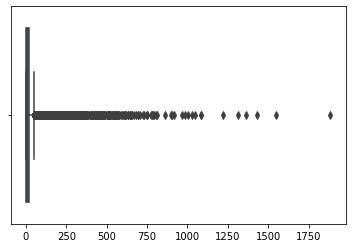

In [ ]:
sns.boxplot(df_first_answer)
plt.show()

#Segmented Univariate Analysis - segmenting the time taken to answer into two segments, <= 48 hours and more than 48 hours

In [ ]:
df_first_answer[df_first_answer.Time_to_answer < 49].describe()

,Time_to_answer
count,31534.000000
mean,8.427095
std,11.638117
min,0.000150
25%,0.142383
50%,2.286489
75%,13.261079
max,48.999980


In [ ]:
df_first_answer[df_first_answer.Time_to_answer > 48].describe()

,Time_to_answer
count,3915.000000
mean,126.599742
std,123.589544
min,48.013275
25%,62.314155
50%,85.484442
75%,138.517410
max,1884.730289


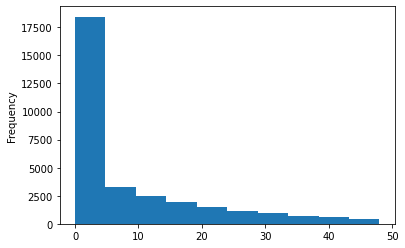

In [ ]:
df_first_answer.Time_to_answer.plot.hist(range=(0,48),bins=10)
plt.show()

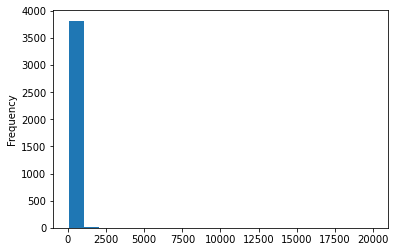

In [ ]:
df_first_answer.Time_to_answer.plot.hist(range=(49,20000),bins=20)
plt.show()

**89% questions are answered within 48 hours**

In [ ]:
within_48_hrs = df_first_answer[df_first_answer.Time_to_answer < 49].count()/df_first_answer.count()
more_than_48_hrs = df_first_answer[df_first_answer.Time_to_answer > 48].count()/df_first_answer.count()

In [ ]:
print(within_48_hrs , more_than_48_hrs)

Time_to_answer    0.891799
dtype: float64 Time_to_answer    0.110718
dtype: float64


In [ ]:
df_qa_tags.head(2)

,Id_ques,OwnerUserId_ques,CreationDate_ques,Score_ques,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Time_to_answer,Tag,New_tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,124,26.0,2008-08-01 16:09:47+00:00,80,12,2.211111,flex,Others
1,80,26.0,2008-08-01 13:57:07+00:00,26,124,26.0,2008-08-01 16:09:47+00:00,80,12,2.211111,actionscript-3,Others


In [ ]:
arr_DS_users = []

In [ ]:
print(len(df_qa_tags[df_qa_tags.New_tag=="Data Science"].OwnerUserId_ans.unique()))
print(len(df_qa_tags[df_qa_tags.New_tag=="Data Science"].OwnerUserId_ques.unique()))

71319
84787


In [ ]:
for user in df_qa_tags[df_qa_tags.New_tag=="Data Science"].OwnerUserId_ans.unique():
  arr_DS_users.append(user)
for user in df_qa_tags[df_qa_tags.New_tag=="Data Science"].OwnerUserId_ques.unique():
  arr_DS_users.append(user)

In [ ]:
len(arr_DS_users)

156106

In [ ]:
arr_DS_users = list(dict.fromkeys(arr_DS_users))
len(arr_DS_users)

139300

In [ ]:
df_users.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [ ]:
arr_DS_users = [int(i) for i in arr_DS_users]
len(arr_DS_users)

139300

In [ ]:
len(df_users.id.unique())

465460

#List of relevant users to notify when a Data Science question is posted

In [ ]:
df_DS_users = df_users[df_users.id.isin(arr_DS_users)].sort_values(by="reputation",ascending=False)
df_DS_users.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
110999,22656,Jon Skeet,2008-09-26 12:05:05.15 UTC,2019-08-31 06:45:36.61 UTC,1128126,16420,6921,1835157
35238,6309,VonC,2008-09-13 22:22:33.173 UTC,2019-08-31 23:30:47.713 UTC,888089,50295,268,155016
69941,157882,BalusC,2009-08-17 16:42:02.403 UTC,2019-08-30 20:24:46.513 UTC,884381,15372,21262,413877
188604,29407,Darin Dimitrov,2008-10-19 16:07:47.823 UTC,2019-08-31 14:58:22.687 UTC,873733,1952,2651,260252
1151850,1144035,Gordon Linoff,2012-01-11 19:53:57.59 UTC,2019-08-31 23:09:07.247 UTC,851064,13917,41,268394


In [ ]:
df_DS_users.shape

(84213, 8)

In [ ]:
ls_users = df_users.id.unique()

In [ ]:
ls_non_matches = [user for user in arr_DS_users if user not in ls_users]
len(ls_non_matches)

55087

In [ ]:
ls_non_matches[0:10]

[3401498,
 4768611,
 547735,
 19302,
 3850,
 3420570,
 4039065,
 1619925,
 695800,
 121489]

In [ ]:
len(df_questions[df_questions.OwnerUserId.isin(ls_non_matches)].OwnerUserId.unique())

54871

In [ ]:
len(df_answers[df_answers.OwnerUserId.isin(ls_non_matches)].OwnerUserId.unique())

570

In [ ]:
len(df_questions.OwnerUserId.unique())

630909

In [ ]:
len(df_answers.OwnerUserId.unique())

468797

In [ ]:
df_answers[df_answers.OwnerUserId.isin(ls_non_matches)]

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
1666,36907,3850.0,2008-08-31 15:17:14+00:00,20850,2,<p>The following entry in <code>/etc/fstab</co...
3093,61754,1151.0,2008-09-15 00:26:58+00:00,61750,0,<p>SubSonic can do this for you if you if you ...
4614,90644,1151.0,2008-09-18 07:08:19+00:00,90580,7,"<p>I did this in .NET:</p>\n\n<p><a href=""http..."
4937,97439,1151.0,2008-09-18 22:00:12+00:00,96160,23,<p>It's been my experience with the Commerce S...
9577,181144,19302.0,2008-10-08 02:31:40+00:00,181130,0,"<p>You want do use md5 hashing. Basically, it ..."
...,...,...,...,...,...,...
2011090,40070846,6914894.0,2016-10-16 13:32:24+00:00,40069760,1,<p>If you want replace Doc2 with Doc1 you can ...
2011112,40071399,6914894.0,2016-10-16 14:27:00+00:00,40071030,1,<pre><code>db.Test2.aggregate([\n {\n $u...
2011154,40072633,6914894.0,2016-10-16 16:33:30+00:00,40064600,0,<p>MongoDB don't have notification if somethin...
2012342,40099142,7034285.0,2016-10-18 03:43:34+00:00,24332140,1,<p>There are a couple of ways to do this. Ass...


In [ ]:
df_users[df_users.id==3850]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views


In [ ]:
df_questions[df_questions.Id==20850]

,Id,OwnerUserId,CreationDate,Score,Title,Body
213,20850,1120.0,2008-08-21 19:16:27+00:00,2,How to stop NTFS volume auto-mounting on OS X?,<p>I'm a bit newbieish when it comes to the de...


In [ ]:
df_users[df_users.id==1120]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
7701,1120,Shaun Austin,2008-08-12 13:45:53.16 UTC,2016-07-08 12:37:17.7 UTC,3253,369,38,264


In [ ]:
ls_top10_ques = []
for qid in df_questions.sort_values(by="Score",ascending=False).head(10).Id:
  ls_top10_ques.append(qid)
ls_top10_ques

[348170,
 40480,
 406230,
 520650,
 2669690,
 4366730,
 1232040,
 16956810,
 3010840,
 2530]

#Top 10 questions with high score

In [ ]:
df_questions.sort_values(by="Score",ascending=False).head(10)

,Id,OwnerUserId,CreationDate,Score,Title,Body
4907,348170,14069.0,2008-12-07 21:57:46+00:00,5190,How to undo 'git add' before commit?,<p>I mistakenly added files using the command:...
441,40480,4315.0,2008-09-02 20:14:29+00:00,3613,"Is Java ""pass-by-reference"" or ""pass-by-value""?",<p>I always thought Java was <strong>pass-by-r...
5859,406230,36830.0,2009-01-02 07:30:16+00:00,2537,Regular expression to match line that doesn't ...,<p>I know it's possible to match a word and th...
7771,520650,825.0,2009-02-06 15:14:04+00:00,2399,Make an existing Git branch track a remote bra...,<p>I know how to make a new branch that tracks...
57759,2669690,151495.0,2010-04-19 18:00:09+00:00,2363,Why does Google prepend while(1); to their JSO...,<p>Why does Google prepend <code>while(1);</co...
105015,4366730,495452.0,2010-12-06 13:14:05+00:00,1760,How to check if a string contains a specific w...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...
22609,1232040,149738.0,2009-08-05 09:08:39+00:00,1759,How do I empty an array in JavaScript?,<p>Is there a way to empty an array and if so ...
485729,16956810,954986.0,2013-06-06 08:06:45+00:00,1716,How to find all files containing specific text...,<p>I'm trying to find a way to scan my entire ...
67133,3010840,304725.0,2010-06-10 00:04:27+00:00,1620,Loop through an array in JavaScript,<p>In Java you can use a <code>for</code> loop...
26,2530,307.0,2008-08-05 16:22:32+00:00,1614,How do you disable browser Autocomplete on web...,<p>How do you disable <code>autocomplete</code...


In [ ]:
df_ques_tags.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag,New_tag,Year
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex,Others,2008
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3,Others,2008
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air,Others,2008
3,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn,Others,2008
4,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn,Others,2008


#Trend of Data Science tags by year

In [ ]:
pd.crosstab(columns=df_ques_tags[df_ques_tags.New_tag=="Data Science"]['Tag'], index=df_ques_tags[df_ques_tags.New_tag=="Data Science"]['Year'])

Tag,excel,matlab,python,r,sas,sql
Year,,,,,,
2008,27,4,205,0,0,192
2009,160,55,1230,60,6,1049
2010,290,197,2698,222,12,2001
2011,513,385,4246,582,25,2991
2012,855,750,6392,1257,35,4302
2013,1430,1165,9631,2233,102,6650
2014,1931,1425,11600,3054,151,7480
2015,2539,1356,13893,4155,193,5742
2016,2543,1104,14050,4046,166,4900


In [ ]:
DS_Trend = pd.crosstab(columns=df_ques_tags[df_ques_tags.New_tag=="Data Science"]['Tag'], index=df_ques_tags[df_ques_tags.New_tag=="Data Science"]['Year'])

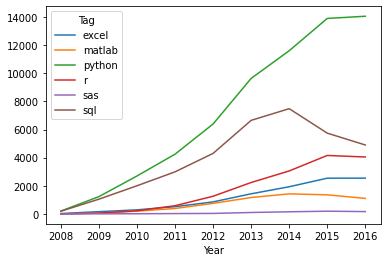

In [ ]:
DS_Trend.plot()
plt.show()

In [ ]:
Language_Trend = pd.crosstab(columns=df_ques_tags[df_ques_tags.New_tag=="Popular Languages"]['Tag'], index=df_ques_tags[df_ques_tags.New_tag=="Popular Languages"]['Year'])

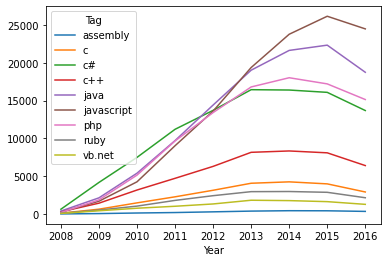

In [ ]:
Language_Trend.plot()
plt.show()

In [ ]:
df_users.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


#Relation between users' reputation, up_votes, down_votes and views

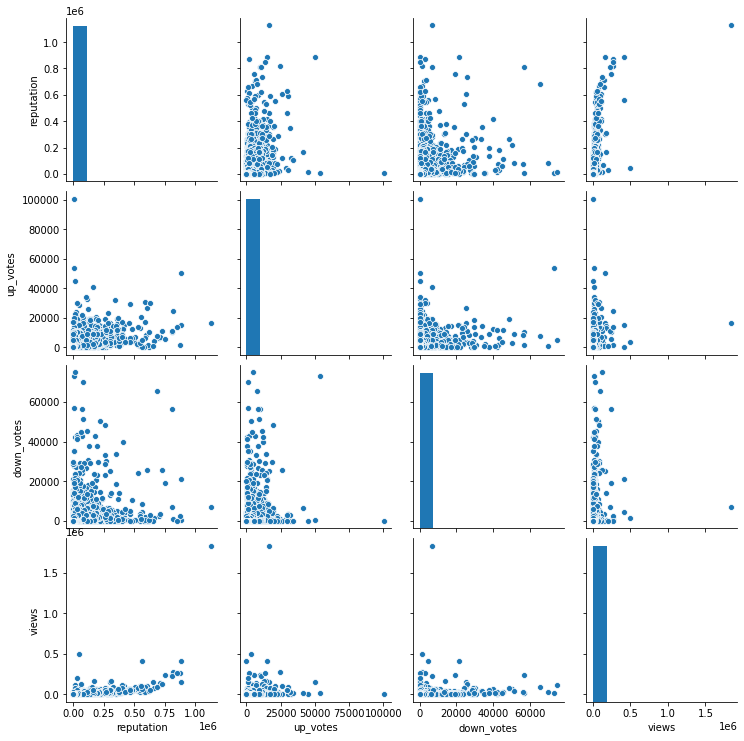

In [ ]:
sns.pairplot(df_users[["reputation","up_votes","down_votes","views"]])
plt.show()

In [ ]:
df_users[["reputation","up_votes","down_votes","views"]].corr()

,reputation,up_votes,down_votes,views
reputation,1.000000,0.491563,0.301170,0.547727
up_votes,0.491563,1.000000,0.262897,0.251492
down_votes,0.301170,0.262897,1.000000,0.226370
views,0.547727,0.251492,0.226370,1.000000


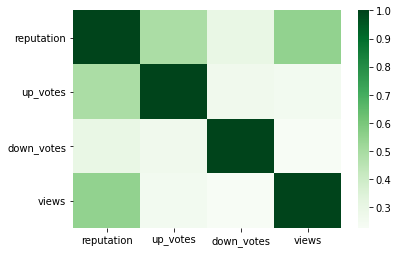

In [ ]:
sns.heatmap(data=df_users[["reputation","up_votes","down_votes","views"]].corr(),cmap="Greens")
plt.show()

In [ ]:
df_q_t_time = df_qa_tags.groupby(["Id_ques"])["Tag"].nunique().to_frame().merge(df_qa_tags.groupby(["Id_ques"])["Id_ans"].count().to_frame(),left_on="Id_ques",right_on="Id_ques")
df_q_t_time

,Tag,Time_to_answer
Id_ques,,
80,3,2.211111
90,4,0.070278
120,3,1278.850833
180,4,0.907500
260,4,0.463611
...,...,...
40142860,2,0.228611
40142900,3,0.184167
40142910,3,0.885833


In [ ]:
df_q_t_time[["Tag","Id_ans"]].corr()

,Tag,Time_to_answer
Tag,1.000000,0.015869
Time_to_answer,0.015869,1.000000


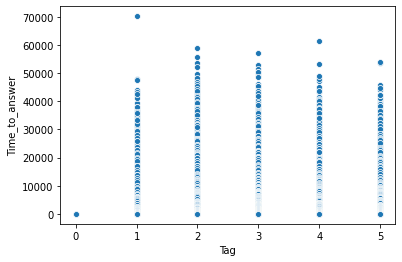

In [ ]:
sns.scatterplot(data=df_q_t_time,x="Tag",y="Id_ans")
plt.show()